In [53]:
import csv
import time
from mpu6050 import mpu6050
import numpy as np
import matplotlib.pyplot as plt


mpu = mpu6050(0x68)
mpu.read_accel_range()

8

In [64]:
mpu.set_accel_range(24)
mpu.read_accel_range()

16

In [42]:
def calibrate():
    stop = time.time()+1
    d = mpu.get_accel_data()
    a = np.array([d['x'], d['y'], d['z']])
    while time.time() < stop:
        d = mpu.get_accel_data()
        a = np.vstack([a, [d['x'], d['y'], d['z']]])
    return np.mean(a, axis=0)

def write_data():
    return none


cal = calibrate()

datapoints = 5000

In [24]:
d = mpu.get_accel_data()
a = np.array([time.time(), d['x'], d['y'], d['z']])
for _ in range(datapoints):
    d = mpu.get_accel_data()
    a = np.vstack([a, [time.time(), d['x'], d['y'], d['z']]])
print('Runtime: {}'.format(a[-1,0]-a[0,0]))
print('Avg Time Slice: {}'.format((a[-1,0]-a[0,0])/datapoints))

Runtime: 5.798521041870117
Avg Time Slice: 0.0011597042083740234


In [43]:
# datapoints = 10000
a = np.zeros((datapoints, 4))
for i in range(datapoints):
    d = mpu.get_accel_data()
    a[i] = [time.time(), d['x'], d['y'], d['z']]
print('Runtime: {}'.format(a[-1,0]-a[0,0]))
print('Avg Time Slice: {}'.format((a[-1,0]-a[0,0])/datapoints))

Runtime: 5.130958795547485
Avg Time Slice: 0.0010261917591094971


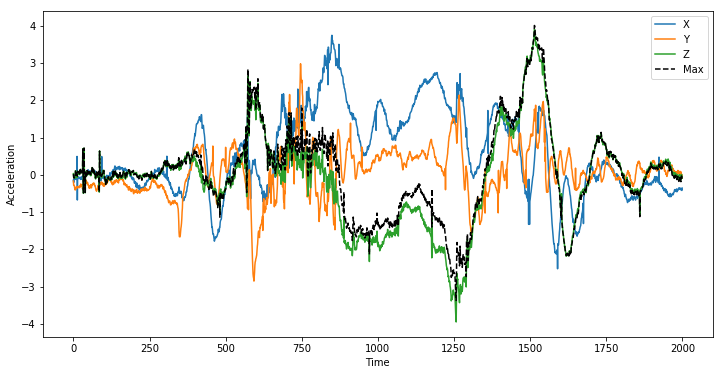

In [52]:
# %matplotlib inline
# plt.plot(a[:,0], a[:,1:3])
# b = a
# # b = a[2000:3500, :]
fig = plt.figure(figsize=(12,6))
# timeseries = b[:,0]-b[0,0]
begin = 0       #Starting time step
# end = len(a)    #Number of steps from begin
end = 2000
timeseries = range(begin, end)
# plt.plot(a[begin:end,0], a[begin:end,1]-cal[0], a[begin:end,0], a[begin:end,2]-cal[1], a[begin:end,0], a[begin:end,3]-cal[2])
# plt.plot(a[begin:end,0], np.max(np.abs(a[begin:end,1:4]-cal), axis=1), '--r')
# plt.plot(a[begin:end,0], np.sqrt(np.sum(np.square(a[begin:end,1:4]), axis=1))-np.sqrt(np.sum(np.square(cal))), '--k')

plt.plot(timeseries, a[begin:end,1]-cal[0], timeseries, a[begin:end,2]-cal[1], timeseries, a[begin:end,3]-cal[2])
# plt.plot(timeseries, np.max(np.abs(a[begin:end,1:4]-cal), axis=1), '--r')
plt.plot(timeseries, np.sqrt(np.sum(np.square(a[begin:end,1:4]), axis=1))-np.sqrt(np.sum(np.square(cal))), '--k')

# plt.plot(timeseries, a[begin:end,1], timeseries, a[begin:end,2], timeseries, a[begin:end,3])
# plt.plot(timeseries, np.max(np.abs(a[begin:end,1:4]), axis=1), '--r')
# plt.plot(timeseries, np.sqrt(np.sum(np.square(a[begin:end,1:4]), axis=1))-9.8, '--k')


plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.legend(['X', 'Y', 'Z', 'Max', 'Normal'])
plt.savefig('testfig.png', dpi=150)
plt.show()

<Figure size 432x288 with 0 Axes>

In [40]:
a = np.loadtxt('output-2019_10_02-17_54_15.txt.gz', delimiter=',')


In [8]:
np.savetxt('output.txt', a, delimiter=',')

In [271]:
print(b[0,1:4])
print(np.square(b[0,1:4]))
print(np.sqrt(np.sum(np.square(b[0,1:4]))))

[ 2.09971486  9.0836011  -3.11725056]
[ 4.40880248 82.51180892  9.71725106]
9.830455862203342


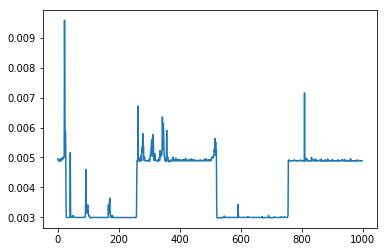

In [219]:
plt.plot(range(np.shape(a)[0]-1),np.diff(a[:,0]))
plt.show()

In [132]:
range(np.shape(a)[0])

range(0, 101)

In [8]:
dir(time)

['CLOCK_BOOTTIME',
 'CLOCK_MONOTONIC',
 'CLOCK_MONOTONIC_RAW',
 'CLOCK_PROCESS_CPUTIME_ID',
 'CLOCK_REALTIME',
 'CLOCK_THREAD_CPUTIME_ID',
 '_STRUCT_TM_ITEMS',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'altzone',
 'asctime',
 'clock',
 'clock_getres',
 'clock_gettime',
 'clock_gettime_ns',
 'clock_settime',
 'clock_settime_ns',
 'ctime',
 'daylight',
 'get_clock_info',
 'gmtime',
 'localtime',
 'mktime',
 'monotonic',
 'monotonic_ns',
 'perf_counter',
 'perf_counter_ns',
 'process_time',
 'process_time_ns',
 'pthread_getcpuclockid',
 'sleep',
 'strftime',
 'strptime',
 'struct_time',
 'thread_time',
 'thread_time_ns',
 'time',
 'time_ns',
 'timezone',
 'tzname',
 'tzset']

In [31]:
time.strftime('%Y_%m_%d-%H_%M_%S')

'2019_10_02-17_30_31'

In [87]:
print(time.time(), mpu.get_accel_data())
# print(mpu.get_accel_data())

1569818649.0246382 {'x': -8.01818135986328, 'y': -0.2442085693359375, 'z': -4.740519287109374}


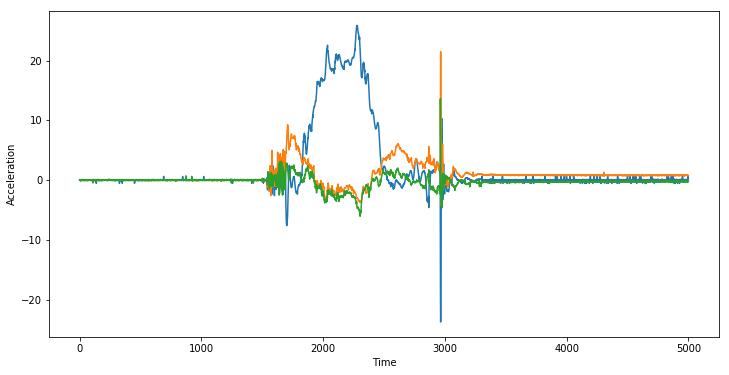

In [25]:
# %matplotlib inline
# plt.plot(a[:,0], a[:,1:3])
b = a
# b = a[2000:3500, :]
fig = plt.figure(figsize=(12,6))
# timeseries = b[:,0]-b[0,0]
timeseries = range(len(b))
fig = plt.plot(timeseries, b[:,1]-cal[0], timeseries, b[:,2]-cal[1], timeseries, b[:,3]-cal[2])
# plt.plot(timeseries, np.max(np.abs(b[:,1:4]-cal), axis=1), '--or')
# plt.plot(timeseries, np.sqrt(np.sum(np.square(b[:,1:4]), axis=1))-9.8, '--k')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.savefig('testfig.png', dpi=150)
plt.show()

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2*np.pi*t)
plt.plot(t, s)

plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('About as simple as it gets, folks')
plt.grid(True)
plt.savefig("test.png")
plt.show()

In [9]:
# from mpu6050 import mpu6050
# mpu = mpu6050(0x68)
# for _ in range(0,1000):
#     print(mpu.get_all_data())

In [ ]:
from tkinter import *
from tkinter import ttk
import csv
import datetime
import time
from mpu6050 import mpu6050

import matplotlib
matplotlib.use("TkAgg")
import matplotlib.pyplot as plt


class PlotRecAccGyro():
	def __init__(self, parent):
		self.parent = parent
		self.parent.title('MPU6050 - Acceleration and Gyroscope')
		self.frame = Frame(self.parent)
		self.frame.pack(fill=BOTH, expand=1)
		self.parent.resizable(width = False, height = False)
		self.plot_trigger = True
		self.record_trigger = False
		
		self.var_all = IntVar()
		self.var_plot = IntVar()
		self.var_rec = IntVar()
		self.accgyro_chkbtn_state = []
		self.chkbtn_list = []
		
		# Call MPU6050 class
		self.mpu = mpu6050(0x68)
	
		# LabelFrame - Select components		
		self.labelframe_comp = LabelFrame(self.frame, text= 'Select components')
		self.labelframe_comp.grid(row=0,  column=0 , columnspan=3, sticky=N+E+W+S)
		self.labelframe_comp.grid_configure(padx=5, pady=5)

		# LabelFrame - Options to plot and record
		self.labelframe_opt = LabelFrame(self.frame, text= 'Options - Plot and Record')
		self.labelframe_opt.grid(row=0,  column=3 , columnspan=3, sticky=N+E+W+S)
		self.labelframe_opt.grid_configure(padx=5, pady=5)

		# Checkbuttons - Acceleration
		for i,j in enumerate(['Acc_x', 'Acc_y', 'Acc_z']):
			self.var_acc = IntVar()
			self.acc_chkbtn = Checkbutton(self.labelframe_comp, text=j, variable=self.var_acc, command=self.components_chk_func, padx=5, pady=5)
			self.acc_chkbtn.grid(row=i, column=0)
			self.accgyro_chkbtn_state.append(self.var_acc)
			self.chkbtn_list.append(self.acc_chkbtn)

		# Checkbuttons - Gyroscope
		for i,j in enumerate(['Gyro_x', 'Gyro_y', 'Gyro_z']):
			self.var_gyro = IntVar()
			self.gyro_chkbtn = Checkbutton(self.labelframe_comp, text=j, variable=self.var_gyro, command=self.components_chk_func, padx=5, pady=5)
			self.gyro_chkbtn.grid(row=i,  column=1)
			self.accgyro_chkbtn_state.append(self.var_gyro)
			self.chkbtn_list.append(self.gyro_chkbtn)

		# Checkbutton - All
		self.all_chkbtn = Checkbutton(self.labelframe_comp, text='All', variable=self.var_all, command=self.all_chk_func, padx=5, pady=5)
		self.all_chkbtn.grid(row=1, column=2)    

		# Button - Plot
		self.plot_chkbtn = ttk.Button(self.labelframe_opt, text='Start Plotting', command=lambda: self.plot_start_stop('plt_btn'))
		self.plot_chkbtn.grid(row = 0, column=0, sticky=N+E+W+S, padx=5, pady=10)
		self.plot_chkbtn.configure(state='disabled')

		# Button - Record to a file
		self.rec_chkbtn = ttk.Button(self.labelframe_opt, text='Start Recording', command=lambda: self.record_start_stop('rec_btn'))
		self.rec_chkbtn.grid(row = 1, column=0, sticky=N+E+W+S, padx=5, pady=10)
		self.rec_chkbtn.configure(state='disabled')
		
		# Label - File name
		self.rec_text = Label(self.labelframe_opt, text='to file (.csv)')
		self.rec_text.grid(row=1, column=1, sticky=N+E+W+S)
		
		# Entry - File name (Default name: SensorDataFile)
		self.file_name = ttk.Entry(self.labelframe_opt)
		self.file_name.insert(0,'SensorDataFile')
		self.file_name.grid(row=1, column=2, sticky=N+E+W+S, padx=5, pady=10)
		self.file_name.configure(state='disabled')

	# Function called on clicking on 'All' checkbutton
	def all_chk_func(self):
		if [i.get() for i in self.accgyro_chkbtn_state] != ([1]*6):
			[i.set(1) for i in self.accgyro_chkbtn_state]
			self.plot_chkbtn.configure(state='normal')
		else:
			[i.set(0) for i in self.accgyro_chkbtn_state]
			self.plot_chkbtn.configure(state='disabled')
	
	# Function called on clicking on 'Record' checkbutton
	def rec_chk_func(self):
		if self.var_rec.get() == 1:
			self.file_name.configure(state='normal')
		else:
			self.file_name.configure(state='disabled')

	# Function called on clicking on acceleration or gyroscope checkbuttons		
	def components_chk_func(self):
		if (0 in [i.get() for i in self.accgyro_chkbtn_state]):
			self.var_all.set(0)
		else:
			self.var_all.set(1)
		if (1 in [i.get() for i in self.accgyro_chkbtn_state]):
			self.plot_chkbtn.configure(state='normal')
		else:
			self.plot_chkbtn.configure(state='disabled')

	# Function called on clicking on 'Start plotting' or 'Stop plotting' button		
	def plot_start_stop(self, btn_name):
		if self.plot_chkbtn['text'] == 'Start Plotting':
			self.plot_chkbtn['text'] = 'Stop Plotting'
			self.rec_chkbtn.configure(state='normal')
			self.file_name.configure(state='normal')
			self.all_chkbtn.configure(state='disabled')
			for i in self.chkbtn_list:
				i.configure(state='disabled')
			self.plot_trigger = True
			self.record_trigger = False
			
			n_plots = [i.get() for i in self.accgyro_chkbtn_state]
			acc_n_plots = n_plots[0:3]
			gyro_n_plots = n_plots[3:6]
			
			time_values = [i for i in range(50,0,-1)]
			acc_values = [[0] * 50, [0] * 50, [0] * 50]
			gyro_values = [[0] * 50, [0] * 50, [0] * 50]

			plt.ion()
			acc_legends = ['Acc_x', 'Acc_y', 'Acc_z']
			gyro_legends = ['Gyro_x', 'Gyro_y', 'Gyro_z']
			if (1 in acc_n_plots) and (1 in gyro_n_plots):
				fig, ax = plt.subplots(2,1, figsize = (10,7))
				ax[0].set_xlim(50,0)
				ax[1].set_xlim(50,0)
				ax[0].set_ylim([-30,30]) 
				ax[1].set_ylim([-300,300])
				for i, (title, y_axis_label) in enumerate([('Acceleration', 'Acceleration [m/s^2]'), ('Gyroscope', 'Angular velocity [deg/s]')]):
					ax[i].set_title(title)
					ax[i].set_ylabel(y_axis_label)
					ax[i].set_xlabel('Latest 50 readings')
					ax[i].grid()
				acc_plot_list = [ax[0].plot(time_values, acc_values[0], label = acc_legends[i])[0] if j==1 else 0 for i,j in enumerate(acc_n_plots)]
				gyro_plot_list = [ax[1].plot(time_values, gyro_values[0], label = gyro_legends[i])[0] if j==1 else 0 for i,j in enumerate(gyro_n_plots)]
				ax[0].legend(loc='upper left', fancybox=True, shadow=True)
				ax[1].legend(loc='upper left', fancybox=True, shadow=True)
			else:
				fig, ax = plt.subplots(1,1, figsize = (10,4))
				ax.set_xlim(50,0)
				if 1 in acc_n_plots:
					acc_plot_list = [ax.plot(time_values, acc_values[0], label = acc_legends[i])[0] if j==1 else 0 for i,j in enumerate(acc_n_plots)]
					ax.set_title('Acceleration')
					ax.set_xlabel('Latest 50 readings')
					ax.set_ylabel('Acceleration [m/s^2]')
					ax.set_ylim([-30,30])
					ax.grid()
				else:
					gyro_plot_list = [ax.plot(time_values, gyro_values[0], label = gyro_legends[i])[0] if j==1 else 0 for i,j in enumerate(gyro_n_plots)]
					ax.set_title('Gyroscope')
					ax.set_xlabel('Latest 50 readings')
					ax.set_ylabel('Angular velocity [deg/s]')
					ax.set_ylim([-300,300])
					ax.grid()
				ax.legend(loc='upper left', fancybox=True, shadow=True)
			plt.tight_layout()
					
			while self.plot_trigger:
				current_time = datetime.datetime.now()
				accel_data = self.mpu.get_accel_data()
				gyro_data = self.mpu.get_gyro_data()
				current_acc = [accel_data['x'], accel_data['y'], accel_data['z']]
				current_gyro = [gyro_data['x'], gyro_data['y'], gyro_data['z']]
				
				for i, j in enumerate(acc_n_plots):
					if j == 1:
						acc_values[i].append(current_acc[i])
						del acc_values[i][0]
						acc_plot_list[i].set_ydata(acc_values[i])
				for i, j in enumerate(gyro_n_plots):
					if j == 1:
						gyro_values[i].append(current_gyro[i])
						del gyro_values[i][0]
						gyro_plot_list[i].set_ydata(gyro_values[i])
					
				if self.record_trigger: 
					row = [current_time.strftime('%Y-%m-%d'), current_time.strftime('%H:%M:%S'), current_time.strftime('%f')]
					row = row + [i for i,j in zip(current_acc + current_gyro, [i.get() for i in self.accgyro_chkbtn_state]) if j==1]
					self.row_to_write.writerow(row)
				plt.draw()
				plt.pause(0.0001)
			plt.close('all')
			
		elif self.plot_chkbtn['text'] == 'Stop Plotting':
			self.plot_chkbtn['text'] = 'Start Plotting'
			self.rec_chkbtn.configure(state='disabled')
			self.file_name.configure(state='disabled')			
			self.all_chkbtn.configure(state='normal')
			for i in self.chkbtn_list:
				i.configure(state='normal')
			self.plot_trigger = False
			self.record_trigger = False

	# Function called on clicking on 'Start writing' or 'Stop writing' button		
	def record_start_stop(self, btn_name):
		if self.rec_chkbtn['text'] == 'Start Recording':
			self.rec_chkbtn['text'] = 'Stop Recording'
			self.plot_chkbtn.configure(state='disabled')
			self.file_name.configure(state='disabled')	
			print('Started recording sensor data...')
		
			if self.file_name.get() != '':
				filename = self.file_name.get()
			else:
				filename = 'NoFileName'
			self.file_to_write = open(filename + '.csv', 'w')			# Open the file
			self.row_to_write = csv.writer(self.file_to_write, lineterminator='\n')
			column_titles = ['Date\n(YY:MM:DD)', 'Time\n(HH:MM:SS)', 'Time\n(µs)']
			column_titles = column_titles + [i for i,j in zip(['Ax\n(m/s^2)', 'Ay\n(m/s^2)', 'Az\n(m/s^2)', 'Gx\n(deg/s)', 'Gy\n(deg/s)', 'Gz\n(deg/s)'], [i.get() for i in self.accgyro_chkbtn_state]) if j==1]
			self.row_to_write.writerow(column_titles)
			self.record_trigger = True			
			
		elif self.rec_chkbtn['text'] == 'Stop Recording':
			self.rec_chkbtn['text'] = 'Start Recording'
			self.plot_chkbtn.configure(state='normal')
			self.file_name.configure(state='normal')
			print('Stopped recording sensor data...')
			self.record_trigger = False
			self.file_to_write.close()